#### <center>KDD CUP 1999</center>

#### Load Training and Test Datta

In [1]:
import pandas as pd

training_data = pd.read_csv('train.txt', names = ["duration","protocol_type","service","flag","src_bytes","dst_bytes","land",
"wrong_fragment","urgent","hot","num_failed_logins","logged_in",
"num_compromised","root_shell","su_attempted","num_root","num_file_creations",
"num_shells","num_access_files","num_outbound_cmds","is_host_login",
"is_guest_login","count","srv_count","serror_rate", "srv_serror_rate",
"rerror_rate","srv_rerror_rate","same_srv_rate", "diff_srv_rate", "srv_diff_host_rate","dst_host_count","dst_host_srv_count","dst_host_same_srv_rate",
"dst_host_diff_srv_rate","dst_host_same_src_port_rate",
"dst_host_srv_diff_host_rate","dst_host_serror_rate","dst_host_srv_serror_rate",
"dst_host_rerror_rate","dst_host_srv_rerror_rate","attack", "last_flag"])

test_data = pd.read_csv('test.txt', names = ["duration","protocol_type","service","flag","src_bytes","dst_bytes","land",
"wrong_fragment","urgent","hot","num_failed_logins","logged_in",
"num_compromised","root_shell","su_attempted","num_root","num_file_creations",
"num_shells","num_access_files","num_outbound_cmds","is_host_login",
"is_guest_login","count","srv_count","serror_rate", "srv_serror_rate",
"rerror_rate","srv_rerror_rate","same_srv_rate", "diff_srv_rate", "srv_diff_host_rate","dst_host_count","dst_host_srv_count","dst_host_same_srv_rate",
"dst_host_diff_srv_rate","dst_host_same_src_port_rate",
"dst_host_srv_diff_host_rate","dst_host_serror_rate","dst_host_srv_serror_rate",
"dst_host_rerror_rate","dst_host_srv_rerror_rate","attack", "last_flag"])

In [2]:
def get_label(label):
    if label == 'normal':
        return 1;
    else:
        return -1;

In [3]:
train_y = training_data['attack'].apply(get_label)
test_y = test_data['attack'].apply(get_label)

In [4]:
training_data.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,last_flag
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,20
1,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15
2,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,19
3,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21
4,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21


#### Visualization

In [5]:
training_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125973 entries, 0 to 125972
Data columns (total 43 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     125973 non-null  int64  
 1   protocol_type                125973 non-null  object 
 2   service                      125973 non-null  object 
 3   flag                         125973 non-null  object 
 4   src_bytes                    125973 non-null  int64  
 5   dst_bytes                    125973 non-null  int64  
 6   land                         125973 non-null  int64  
 7   wrong_fragment               125973 non-null  int64  
 8   urgent                       125973 non-null  int64  
 9   hot                          125973 non-null  int64  
 10  num_failed_logins            125973 non-null  int64  
 11  logged_in                    125973 non-null  int64  
 12  num_compromised              125973 non-null  int64  
 13 

In [6]:
training_data.describe()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,last_flag
count,125973.00000,1.259730e+05,1.259730e+05,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,...,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000
mean,287.14465,4.556674e+04,1.977911e+04,0.000198,0.022687,0.000111,0.204409,0.001222,0.395736,0.279250,...,115.653005,0.521242,0.082951,0.148379,0.032542,0.284452,0.278485,0.118832,0.120240,19.504060
std,2604.51531,5.870331e+06,4.021269e+06,0.014086,0.253530,0.014366,2.149968,0.045239,0.489010,23.942042,...,110.702741,0.448949,0.188922,0.308997,0.112564,0.444784,0.445669,0.306557,0.319459,2.291503
min,0.00000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.00000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,10.000000,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.000000
50%,0.00000,4.400000e+01,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,63.000000,0.510000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000
75%,0.00000,2.760000e+02,5.160000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,255.000000,1.000000,0.070000,0.060000,0.020000,1.000000,1.000000,0.000000,0.000000,21.000000
max,42908.00000,1.379964e+09,1.309937e+09,1.000000,3.000000,3.000000,77.000000,5.000000,1.000000,7479.000000,...,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,21.000000


array([[<AxesSubplot:title={'center':'duration'}>,
        <AxesSubplot:title={'center':'src_bytes'}>,
        <AxesSubplot:title={'center':'dst_bytes'}>,
        <AxesSubplot:title={'center':'land'}>,
        <AxesSubplot:title={'center':'wrong_fragment'}>,
        <AxesSubplot:title={'center':'urgent'}>],
       [<AxesSubplot:title={'center':'hot'}>,
        <AxesSubplot:title={'center':'num_failed_logins'}>,
        <AxesSubplot:title={'center':'logged_in'}>,
        <AxesSubplot:title={'center':'num_compromised'}>,
        <AxesSubplot:title={'center':'root_shell'}>,
        <AxesSubplot:title={'center':'su_attempted'}>],
       [<AxesSubplot:title={'center':'num_root'}>,
        <AxesSubplot:title={'center':'num_file_creations'}>,
        <AxesSubplot:title={'center':'num_shells'}>,
        <AxesSubplot:title={'center':'num_access_files'}>,
        <AxesSubplot:title={'center':'num_outbound_cmds'}>,
        <AxesSubplot:title={'center':'is_host_login'}>],
       [<AxesSubplot:titl

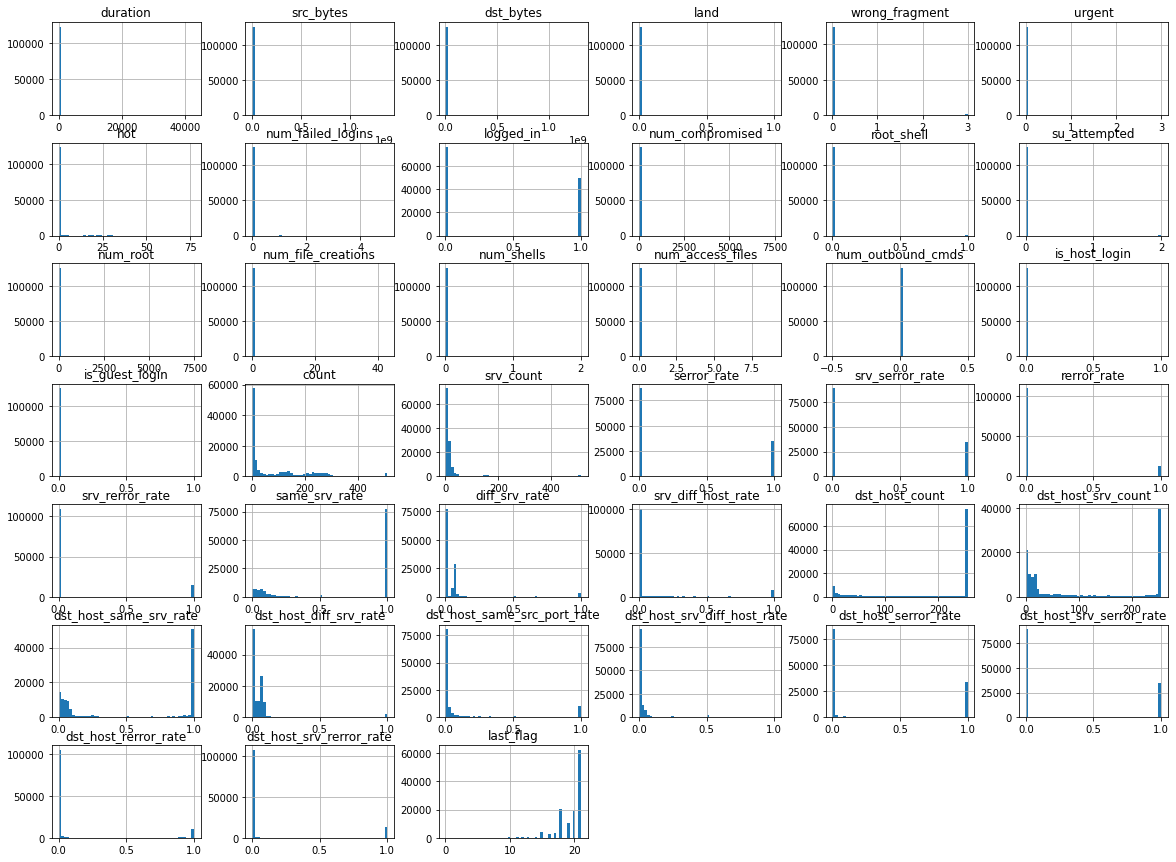

In [7]:
training_data.hist(bins = 50, figsize = (20, 15))

In [8]:
training_data.columns

Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
       'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
       'su_attempted', 'num_root', 'num_file_creations', 'num_shells',
       'num_access_files', 'num_outbound_cmds', 'is_host_login',
       'is_guest_login', 'count', 'srv_count', 'serror_rate',
       'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
       'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate', 'attack', 'last_flag'],
      dtype='object')

In [9]:
training_data['attack'].value_counts()

normal             67343
neptune            41214
satan               3633
ipsweep             3599
portsweep           2931
smurf               2646
nmap                1493
back                 956
teardrop             892
warezclient          890
pod                  201
guess_passwd          53
buffer_overflow       30
warezmaster           20
land                  18
imap                  11
rootkit               10
loadmodule             9
ftp_write              8
multihop               7
phf                    4
perl                   3
spy                    2
Name: attack, dtype: int64

#### Preprocessing

In [10]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import QuantileTransformer
from sklearn.feature_extraction.text import CountVectorizer

In [11]:
from sklearn.base import BaseEstimator, TransformerMixin

class Get_top_categories(BaseEstimator, TransformerMixin):
    """Create a class to keep the top categories, the rest categories are labeled as 'other'
    """
    
    def __init__(self, top_num = 10): # no *args or **kargs
        """Create a class
        
        Arg:
            top_num (int), the number of top categories kept, default number is 10
        """
        self.top_num = top_num
    
    def fit(self, X, y = None):
        """Fit the class
        
        Arg:
            X (Pandas.Series), a column of a Pandas.DataFrame
            y (None), not used
        """
        temp = X.value_counts()
        self.columns = list(temp[:self.top_num].index)
        return self
    
    def containe(self, s):
        """Process record
        
        Arg:
            s (str), a recod in the categorical column
            
        Return:
            str, return the same string is a recod in the top category list; otherwise, return 'other'
        """
        if s in self.columns:
            return s
        else:
            return 'other_category'
        
    def transform(self, X):
        """Convert a specific categorical column
        
        Arg:
            X (Pandas.Series), a column of a Pandas.DataFrame
            
        Return:
            Pandas.Series, processed column
        """
        temp = X.apply(self.containe)
        return temp

In [12]:
class DoNothing(BaseEstimator, TransformerMixin):
    """Do not change anything"""
    def __init__(self):
        pass
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        temp = X.copy()
        return temp

In [13]:
# process numerical features
num_pipeline = Pipeline([
    ('std_scaler', StandardScaler()),
])

num_pipeline_gaussian = Pipeline([
    ('quantile', QuantileTransformer(output_distribution='normal', random_state=0)),
    #('std_scaler', StandardScaler()),  
])

In [14]:
# process categorical features with bag of words
cat_pipeline = Pipeline([
    ('bag_of_words', CountVectorizer()),
])

cat_pipeline_five = Pipeline([
    ('more_than_five', Get_top_categories(top_num=5)),
    ('bag_of_words', CountVectorizer()),    
])

cat_pipeline_ten = Pipeline([
    ('more_than_ten', Get_top_categories()),
    ('bag_of_words', CountVectorizer()),    
])

In [15]:
# do not change features
do_nothing_pipeline = Pipeline([
    ('do_nothing', DoNothing())
])

In [16]:
from sklearn.compose import ColumnTransformer

preprocess_pipeline = ColumnTransformer([
        ("num_pipeline_guassion", num_pipeline_gaussian, ['duration', 'src_bytes', 'dst_bytes', 'hot', 'num_compromised', 'num_root', 'num_file_creations', 'num_access_files', 'count', 'srv_count', 'dst_host_count', 'dst_host_srv_count']), # 3, pass a DataFrame to num_pipeline
        ("cat_pipeline_protocol_type", cat_pipeline, 'protocol_type'), # 3, pass a Series to cat_pipeline
        ("cat_pipeline_service", cat_pipeline_ten, 'service'), # 11, pass a Series to cat_pipeline_ten  
        ("cat_pipeline_flag", cat_pipeline_five, 'flag'), # 6, pass a Series to cat_pipeline_ten
        ("do_nothing", do_nothing_pipeline, ['land', 'wrong_fragment', 'urgent', 'num_failed_logins', 'logged_in', 'root_shell', 'su_attempted', 'num_shells', 'num_outbound_cmds', 'is_host_login', 'is_guest_login', 'serror_rate', 'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate', 'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_same_srv_rate', 'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate', 'dst_host_serror_rate', 'dst_host_srv_serror_rate', 'dst_host_rerror_rate', 'dst_host_srv_rerror_rate']) # 1, pass a DataFrame to num_pipeline
    ])

In [17]:
# num_pipeline_gaussian, 12
# cat_pipeline_protocol_type, 3
# cat_pipeline_service, 11
# cat_pipeline_flag, 6
# do_nothing, 26
train_x = preprocess_pipeline.fit_transform(training_data)
column1 = ['duration', 'src_bytes', 'dst_bytes', 'hot', 'num_compromised', 'num_root', 'num_file_creations', 'num_access_files', 'count', 'srv_count', 'dst_host_count', 'dst_host_srv_count']
column2 = ['p0', 'p1', 'p2']
column3 = ['s0', 's1', 's2', 's3', 's4', 's5', 's6', 's7', 's8', 's9', 's10']
column4 = ['f0', 'f1', 'f2', 'f3', 'f4', 'f5']
column5 = ['land', 'wrong_fragment', 'urgent', 'num_failed_logins', 'logged_in', 'root_shell', 'su_attempted', 'num_shells', 'num_outbound_cmds', 'is_host_login', 'is_guest_login', 'serror_rate', 'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate', 'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_same_srv_rate', 'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate', 'dst_host_serror_rate', 'dst_host_srv_serror_rate', 'dst_host_rerror_rate', 'dst_host_srv_rerror_rate']
columns = column1+column2+column3+column4+column5
train_x = pd.DataFrame(train_x, columns=columns)

In [18]:
test_x = preprocess_pipeline.transform(test_data)

#### Local Outlier Factor

In [76]:
from sklearn.neighbors import LocalOutlierFactor
lof = LocalOutlierFactor(novelty=True, n_neighbors = 200, algorithm = 'auto', metric = 'manhattan')
lof.fit(train_x[train_y==1])
predict = lof.predict(train_x)

In [77]:
from sklearn.metrics import confusion_matrix
cf_matrix = confusion_matrix(train_y, predict)
pd.DataFrame(cf_matrix, index = ['Malicious_true', 'Normal_true'], columns = ['Malicious_true', 'Normal_true'])

,Malicious_true,Normal_true
Malicious_true,56147,2483
Normal_true,7328,60015


In [78]:
from sklearn.metrics import classification_report
print(classification_report(train_y, predict, target_names=['normal', 'malicious']))

              precision    recall  f1-score   support

      normal       0.88      0.96      0.92     58630
   malicious       0.96      0.89      0.92     67343

    accuracy                           0.92    125973
   macro avg       0.92      0.92      0.92    125973
weighted avg       0.93      0.92      0.92    125973



In [79]:
test_pred = lof.predict(test_x)

In [80]:
print(classification_report(test_y, test_pred, target_names=['normal', 'malicious']))

              precision    recall  f1-score   support

      normal       0.88      0.88      0.88     12833
   malicious       0.84      0.84      0.84      9711

    accuracy                           0.86     22544
   macro avg       0.86      0.86      0.86     22544
weighted avg       0.86      0.86      0.86     22544



#### Reference
* <a href = "https://www.kaggle.com/anushonkar/network-anamoly-detection">Network Anomaly Detection</a>